In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import folium
import geopandas as gpd
from datetime import datetime

In [2]:
# Windows용 한글 폰트 오류 해결
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font_name)
# font_name = "내가 사용하고자 하는 글꼴"

In [4]:
df = pd.read_excel("./data/지하철1km종사자수_인구수.xlsx")

In [5]:
df.head()

,지하철역,종사자수,거주인구수
0,화곡,21436,121043
1,까치산,20138,119443
2,봉천,27624,118550
3,길동,40240,117367
4,응암,25290,115789


In [6]:
df.shape

(299, 3)

In [9]:
df.isna().sum()

지하철역     0
종사자수     0
거주인구수    0
dtype: int64

# 출근시간

- 지하철역에서 회사로 이동할 때 따릉이 이용

- 역 주변 종사자수 데이터와 따릉이 총 거치대수를 활용하여 수요공급지수 판단

In [8]:
df[["지하철역", "종사자수"]].sort_values("종사자수", ascending = False)

,지하철역,종사자수
293,시청,285266
295,을지로입구,281998
296,종각,253275
290,광화문(세종문화회관),238362
161,강남,216794
...,...,...
291,동작(현충원),5756
284,서빙고,5485
297,개화,4149
286,북한산우이,3938


In [39]:
bicy = pd.read_excel("./data/출근_승차_따릉이DB.xlsx")

In [40]:
bicy.head()

,Unnamed: 0,대여소번호,월,대여소명,대여소_위도,대여소_경도,이격거리,지하철역,역사_위도,역사_경도,거치대수,06시-07시,07시-08시,08시-09시,09시-10시,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원
0,0,102,1,망원역 1번출구 앞,37.555649,126.910629,71.0,망원,37.556094,126.910052,15,23,36,90,89,9609,24904,37885,24495
1,1,102,2,망원역 1번출구 앞,37.555649,126.910629,71.0,망원,37.556094,126.910052,15,17,28,73,102,8459,22163,33693,22728
2,2,102,3,망원역 1번출구 앞,37.555649,126.910629,71.0,망원,37.556094,126.910052,15,28,20,99,150,10300,28503,37807,26551
3,3,102,4,망원역 1번출구 앞,37.555649,126.910629,71.0,망원,37.556094,126.910052,15,22,72,189,144,11128,29115,39451,27069
4,4,102,5,망원역 1번출구 앞,37.555649,126.910629,71.0,망원,37.556094,126.910052,15,28,69,213,158,10779,28256,38591,27325


In [42]:
bicy = bicy.groupby(["대여소명", "지하철역"])["거치대수"].mean()

In [52]:
bicy = bicy.groupby("지하철역").sum()

In [55]:
bicy

지하철역
4.19민주묘지       27.0
가락시장           85.0
가산디지털단지        40.0
가양             59.0
가오리            53.0
               ... 
화랑대(서울여대입구)    58.0
회기             31.0
회현(남대문시장)      34.0
효창공원앞          42.0
흑석(중앙대입구)      57.0
Name: 거치대수, Length: 299, dtype: float64

In [53]:
bicy.unique()

array([ 27.,  85.,  40.,  59.,  53.,  73.,  42.,  16.,  76.,  90.,  48.,
        58.,  29.,  75.,  20.,  35.,  45.,  54.,  64.,  62.,  66.,  28.,
        31.,  25.,  13., 107.,  61.,  44.,  55.,  43.,  65., 101.,  70.,
        19.,  30.,  10.,  50.,  47.,  79.,  49.,  23.,  46.,  56.,  39.,
        78.,  60.,  57.,  68., 100., 138., 192.,  38.,  24.,  15.,  18.,
        69., 147.,   5.,  63.,  33.,  67.,  26.,  32.,  51.,   8.,  12.,
        52.,  14.,  37.,  36.,  22.,  34., 102.,   9., 105., 152.,  21.,
        41.,   7.,  71., 114.,  95.,  98.,  81.,  84.,  77.])

In [57]:
bicy.to_csv("./data/역별_따릉이_총거치대수.csv")

In [61]:
bicy = pd.DataFrame(bicy)

In [62]:
bicy

,거치대수
지하철역,
4.19민주묘지,27.0
가락시장,85.0
가산디지털단지,40.0
가양,59.0
가오리,53.0
...,...
화랑대(서울여대입구),58.0
회기,31.0
회현(남대문시장),34.0


In [69]:
bicy.loc["봉천"]

거치대수    69.0
Name: 봉천, dtype: float64

In [59]:
df.head()

,지하철역,종사자수,거주인구수
0,화곡,21436,121043
1,까치산,20138,119443
2,봉천,27624,118550
3,길동,40240,117367
4,응암,25290,115789


In [64]:
df = df.set_index("지하철역")

In [70]:
ds_balance = pd.concat([df, bicy], axis = 1)

In [72]:
ds_balance.head()

,종사자수,거주인구수,거치대수
지하철역,,,
화곡,21436,121043,53.0
까치산,20138,119443,30.0
봉천,27624,118550,69.0
길동,40240,117367,20.0
응암,25290,115789,30.0


In [82]:
ds_balance.to_csv("./data/역별_종사자수_거주인구수_거치대수.csv")

In [106]:
ds_balance = pd.read_csv("./data/역별_종사자수_거주인구수_거치대수.csv")

In [107]:
ds_balance.head()

,지하철역,종사자수,거주인구수,거치대수
0,화곡,21436,121043,53.0
1,까치산,20138,119443,30.0
2,봉천,27624,118550,69.0
3,길동,40240,117367,20.0
4,응암,25290,115789,30.0


In [108]:
# 출근시간대 적정 따릉이수 컬럼
# 24년 지하철 이용비율: 30% (24년 기사)
ds_balance["출근_적정따릉이수"] = round(ds_balance["종사자수"] * 0.3 * 0.01)

In [109]:
ds_balance.head()

,지하철역,종사자수,거주인구수,거치대수,출근_적정따릉이수
0,화곡,21436,121043,53.0,64.0
1,까치산,20138,119443,30.0,60.0
2,봉천,27624,118550,69.0,83.0
3,길동,40240,117367,20.0,121.0
4,응암,25290,115789,30.0,76.0


In [111]:
(ds_balance["거치대수"] < ds_balance["출근_적정따릉이수"]).sum()

265

In [112]:
# 공급적정
(abs(ds_balance["거치대수"] - ds_balance["출근_적정따릉이수"]) <= ds_balance["출근_적정따릉이수"] * 0.25).sum()

52

In [124]:
ds_balance_lst = []
for i in range(len(ds_balance)):
    # 공급부족
    if (ds_balance.iloc[i]["출근_적정따릉이수"] - ds_balance.iloc[i]["거치대수"] > ds_balance.iloc[i]["출근_적정따릉이수"] * 0.25):
        ds_balance_lst.append("공급부족")
    elif ds_balance.iloc[i]["거치대수"] - ds_balance.iloc[i]["출근_적정따릉이수"] > ds_balance.iloc[i]["출근_적정따릉이수"] * 0.25:
        ds_balance_lst.append("공급과잉")
    else:
        ds_balance_lst.append("공급적정")        


In [129]:
ds_balance["출근_수요공급균형"] = ds_balance_lst

In [130]:
ds_balance.head()

,지하철역,종사자수,거주인구수,거치대수,출근_적정따릉이수,퇴근_적정따릉이수,수요공급균형,출근_수요공급균형
0,화곡,21436,121043,53.0,64.0,42.0,공급적정,공급적정
1,까치산,20138,119443,30.0,60.0,39.0,공급부족,공급부족
2,봉천,27624,118550,69.0,83.0,54.0,공급적정,공급적정
3,길동,40240,117367,20.0,121.0,78.0,공급부족,공급부족
4,응암,25290,115789,30.0,76.0,49.0,공급부족,공급부족


In [132]:
ds_balance = ds_balance.drop("수요공급균형", axis = 1)

In [113]:
# 공급과잉
(ds_balance["거치대수"] - ds_balance["출근_적정따릉이수"] > ds_balance["출근_적정따릉이수"] * 0.25).sum()

16

In [114]:
# 공급부족
(ds_balance["출근_적정따릉이수"] - ds_balance["거치대수"] > ds_balance["출근_적정따릉이수"] * 0.25).sum()

231

In [115]:
# 퇴근시간대 적정 따릉이수 컬럼
# 24년 경제활동인구비율 통계: 65%, 지하철 이용비율: 30%
ds_balance["퇴근_적정따릉이수"] = round(ds_balance["종사자수"] * 0.65 * 0.3 * 0.01)

In [116]:
ds_balance.head()

,지하철역,종사자수,거주인구수,거치대수,출근_적정따릉이수,퇴근_적정따릉이수
0,화곡,21436,121043,53.0,64.0,42.0
1,까치산,20138,119443,30.0,60.0,39.0
2,봉천,27624,118550,69.0,83.0,54.0
3,길동,40240,117367,20.0,121.0,78.0
4,응암,25290,115789,30.0,76.0,49.0


In [133]:
ds_balance_lst = []
for i in range(len(ds_balance)):
    # 공급부족
    if (ds_balance.iloc[i]["퇴근_적정따릉이수"] - ds_balance.iloc[i]["거치대수"] > ds_balance.iloc[i]["퇴근_적정따릉이수"] * 0.25):
        ds_balance_lst.append("공급부족")
    elif ds_balance.iloc[i]["거치대수"] - ds_balance.iloc[i]["퇴근_적정따릉이수"] > ds_balance.iloc[i]["퇴근_적정따릉이수"] * 0.25:
        ds_balance_lst.append("공급과잉")
    else:
        ds_balance_lst.append("공급적정")    

In [134]:
ds_balance["퇴근_수요공급균형"] = ds_balance_lst

In [135]:
ds_balance.head()

,지하철역,종사자수,거주인구수,거치대수,출근_적정따릉이수,퇴근_적정따릉이수,출근_수요공급균형,퇴근_수요공급균형
0,화곡,21436,121043,53.0,64.0,42.0,공급적정,공급과잉
1,까치산,20138,119443,30.0,60.0,39.0,공급부족,공급적정
2,봉천,27624,118550,69.0,83.0,54.0,공급적정,공급과잉
3,길동,40240,117367,20.0,121.0,78.0,공급부족,공급부족
4,응암,25290,115789,30.0,76.0,49.0,공급부족,공급부족


In [117]:
# 공급적정
((abs(ds_balance["거치대수"] - ds_balance["퇴근_적정따릉이수"]) <= ds_balance["퇴근_적정따릉이수"] * 0.25)).sum()

78

In [118]:
# 공급과잉
(ds_balance["거치대수"] - ds_balance["퇴근_적정따릉이수"] > ds_balance["퇴근_적정따릉이수"] * 0.25).sum()

55

In [119]:
# 공급부족
(ds_balance["퇴근_적정따릉이수"] - ds_balance["거치대수"] > ds_balance["퇴근_적정따릉이수"] * 0.25).sum()

166

In [136]:
ds_balance.to_csv("./data/출퇴근따릉이_수요공급균형.csv")

In [4]:
ds_balance = pd.read_csv("./data/따릉이_수요공급/출퇴근따릉이_수요공급균형.csv")

In [5]:
ds_balance.head()

,Unnamed: 0,지하철역,종사자수,거주인구수,거치대수,출근_적정따릉이수,퇴근_적정따릉이수,출근_수요공급균형,퇴근_수요공급균형
0,0,화곡,21436,121043,53.0,64.0,42.0,공급적정,공급과잉
1,1,까치산,20138,119443,30.0,60.0,39.0,공급부족,공급적정
2,2,봉천,27624,118550,69.0,83.0,54.0,공급적정,공급과잉
3,3,길동,40240,117367,20.0,121.0,78.0,공급부족,공급부족
4,4,응암,25290,115789,30.0,76.0,49.0,공급부족,공급부족


In [10]:
go.shape

(5, 5)

In [11]:
go = ds_balance[["지하철역", "종사자수", "거치대수", "출근_적정따릉이수", "출근_수요공급균형"]]

In [35]:
leave = ds_balance[["지하철역", "거주인구수", "거치대수", "퇴근_적정따릉이수", "퇴근_수요공급균형"]]

In [36]:
leave.head()

,지하철역,거주인구수,거치대수,퇴근_적정따릉이수,퇴근_수요공급균형
0,화곡,121043,53.0,42.0,공급과잉
1,까치산,119443,30.0,39.0,공급적정
2,봉천,118550,69.0,54.0,공급과잉
3,길동,117367,20.0,78.0,공급부족
4,응암,115789,30.0,49.0,공급부족


In [15]:
sr = go["출근_수요공급균형"].value_counts()

In [28]:
sr2 = leave["퇴근_수요공급균형"].value_counts()

In [25]:
sr

출근_수요공급균형
공급부족    231
공급적정     52
공급과잉     16
Name: count, dtype: int64

In [29]:
sr2

퇴근_수요공급균형
공급부족    166
공급적정     78
공급과잉     55
Name: count, dtype: int64

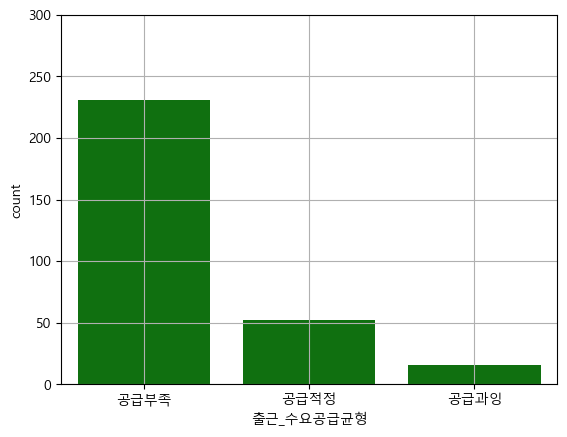

In [37]:
sns.barplot(sr, color = "g")

plt.ylim(0, 300)
plt.grid()

plt.show()

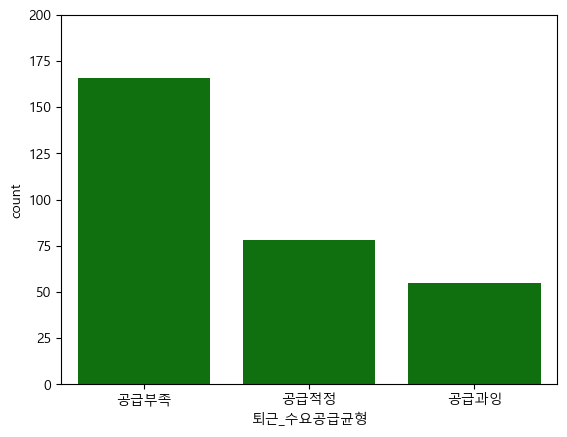

In [33]:
sns.barplot(sr2, color = "g")

plt.ylim(0, 200)

plt.show()

# 시각화

- 공급적정, 부족, 과잉 비율

- 공급과잉인 역 top 10 뽑기 (균형경계값과 거치대수 차이로)

In [3]:
df = pd.read_csv("./data/따릉이_수요공급/출퇴근따릉이_수요공급균형.csv")

In [4]:
df.head()

,Unnamed: 0,지하철역,종사자수,거주인구수,거치대수,출근_적정따릉이수,퇴근_적정따릉이수,출근_수요공급균형,퇴근_수요공급균형
0,0,화곡,21436,121043,53.0,64.0,42.0,공급적정,공급과잉
1,1,까치산,20138,119443,30.0,60.0,39.0,공급부족,공급적정
2,2,봉천,27624,118550,69.0,83.0,54.0,공급적정,공급과잉
3,3,길동,40240,117367,20.0,121.0,78.0,공급부족,공급부족
4,4,응암,25290,115789,30.0,76.0,49.0,공급부족,공급부족


In [5]:
df.columns

Index(['Unnamed: 0', '지하철역', '종사자수', '거주인구수', '거치대수', '출근_적정따릉이수', '퇴근_적정따릉이수',
       '출근_수요공급균형', '퇴근_수요공급균형'],
      dtype='object')

In [6]:
go = df[['지하철역', '종사자수','거치대수', '출근_적정따릉이수', '출근_수요공급균형']]

In [7]:
go.head()

,지하철역,종사자수,거치대수,출근_적정따릉이수,출근_수요공급균형
0,화곡,21436,53.0,64.0,공급적정
1,까치산,20138,30.0,60.0,공급부족
2,봉천,27624,69.0,83.0,공급적정
3,길동,40240,20.0,121.0,공급부족
4,응암,25290,30.0,76.0,공급부족


In [10]:
go[go['출근_수요공급균형'] == "공급부족"].sort_values("출근_적정따릉이수", ascending = False).head()

,지하철역,종사자수,거치대수,출근_적정따릉이수,출근_수요공급균형
293,시청,285266,54.0,856.0,공급부족
295,을지로입구,281998,114.0,846.0,공급부족
296,종각,253275,65.0,760.0,공급부족
290,광화문(세종문화회관),238362,107.0,715.0,공급부족
161,강남,216794,42.0,650.0,공급부족


In [11]:
go[go['출근_수요공급균형'] == "공급과잉"].sort_values("출근_적정따릉이수", ascending = False).head()

,지하철역,종사자수,거치대수,출근_적정따릉이수,출근_수요공급균형
127,고덕,16391,62.0,49.0,공급과잉
247,양원,13693,55.0,41.0,공급과잉
58,서울대벤처타운,11399,53.0,34.0,공급과잉
250,흑석(중앙대입구),11273,57.0,34.0,공급과잉
229,녹천,11042,50.0,33.0,공급과잉
